In [2]:
import cv2
import matplotlib.pyplot as plt


In [3]:
image=cv2.imread("/content/giraffe.avif")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
image.dtype

dtype('uint8')

In [5]:
print(image_rgb.dtype)
print(image_gray.dtype)

uint8
uint8


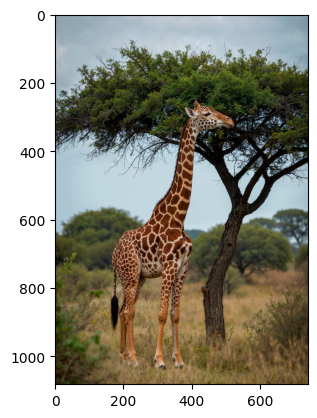

In [ ]:
plt.imshow(image_rgb)

we need binary mask of the image to do this We need to thresholding or canny


In [ ]:
# We need to thresholding or canny
#we need binary mask of the image
"""we can limit threshold for the imae 0- 255 because the image type is uint8. if image type is uint16 0–65535 and float menas 0 -1

threshold2 ≈ 2× or 3× threshold1

Pixel Gradient Value	What Happens
> threshold2	Definitely an edge ✔
< threshold1	Definitely NOT an edge ✖
Between threshold1 & threshold2	Maybe an edge, only kept if connected to a strong edge

Pixel Color	Meaning	Pixel Value
White	Edge detected	255
Black	No edge detected	0

 """

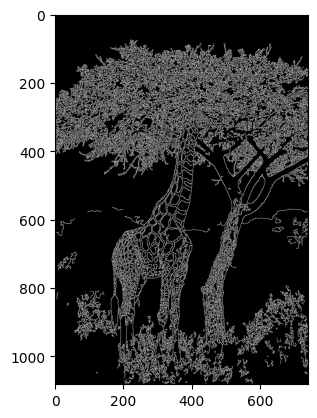

In [ ]:
binary_mask=cv2.Canny(image_gray,threshold1=60,threshold2=180)
plt.imshow(binary_mask,cmap="gray")

cv2.findContours(image, mode, method)

Parameter	Meaning

image	Binary image (usually from threshold / Canny)

mode	How contours are extracted

method	How contour points are stored

🧩 MODE (Contour Retrieval Modes)

These control what contours are returned and what hierarchy info is saved.

Mode	Meaning	When to use

cv2.RETR_EXTERNAL	Retrieves only outermost contours	When you only care about object boundaries

cv2.RETR_LIST	Retrieves all contours, no hierarchy stored	When relationship doesn't matter

cv2.RETR_TREE	Retrieves all contours + full hierarchy (parent-child)	Best for recognizing nested objects (holes inside shapes)

cv2.RETR_CCOMP	Retrieves contours in two levels (outer + inner)	When object has simple holes

cv2.RETR_FLOODFILL	Special — uses floodfill process	Rarely required

Mode	Contours returned

EXTERNAL	Only outer rectangle

LIST	Both rectangles, but no relationship

TREE	Both + knowing inner is inside outer

🔹 METHOD (Contour Approximation Methods)

Method	Meaning	Benefit

cv2.CHAIN_APPROX_NONE	Stores every point in contour	More detailed but heavy

cv2.CHAIN_APPROX_SIMPLE	Compresses horizontal/vertical line points → stores only endpoints

In [ ]:
"""cv2.RETR_LIST that retervies all the contours without any hierachy
they are dome more RETR_TREE, RETR_External RETR_CCOMP, RETR_FLOODFILL

MODE-hierachy relationship b/w contours

Method -- decides who contour points arestored"""

contours,hierachy=cv2.findContours(binary_mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
contours

(array([[[ 214, 1078]],
 
        [[ 215, 1077]],
 
        [[ 216, 1078]],
 
        [[ 215, 1079]]], dtype=int32),
 array([[[ 383, 1074]],
 
        [[ 382, 1075]],
 
        [[ 382, 1077]],
 
        [[ 383, 1078]],
 
        [[ 384, 1077]],
 
        [[ 386, 1077]],
 
        [[ 386, 1076]],
 
        [[ 385, 1075]],
 
        [[ 385, 1074]],
 
        [[ 385, 1075]],
 
        [[ 386, 1076]],
 
        [[ 385, 1077]],
 
        [[ 384, 1077]],
 
        [[ 383, 1078]],
 
        [[ 382, 1077]],
 
        [[ 382, 1076]],
 
        [[ 383, 1075]]], dtype=int32),
 array([[[ 259, 1074]],
 
        [[ 260, 1073]],
 
        [[ 261, 1074]],
 
        [[ 262, 1074]],
 
        [[ 263, 1075]],
 
        [[ 263, 1077]],
 
        [[ 262, 1078]],
 
        [[ 260, 1078]],
 
        [[ 259, 1079]],
 
        [[ 258, 1079]],
 
        [[ 257, 1078]],
 
        [[ 257, 1077]],
 
        [[ 259, 1075]],
 
        [[ 260, 1076]],
 
        [[ 259, 1075]]], dtype=int32),
 array([[[ 334, 1073]],
 

In [ ]:
contour_image1=image.copy()
contour_Match=cv2.drawContours(contour_image1,contours,-1,(0,255,0),5)

Text(0.5, 1.0, 'Contour Match Image')

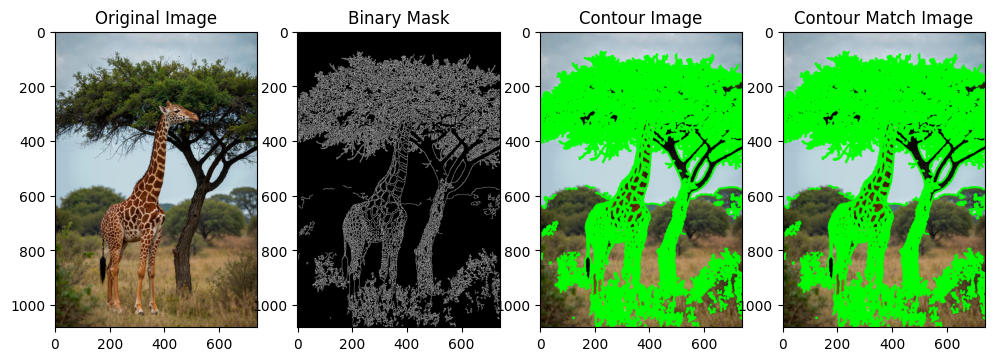

In [ ]:
plt.figure(figsize=(12,10))


plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,4,2)
plt.imshow(binary_mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(contour_image1,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(contour_Match,cv2.COLOR_BGR2RGB))
plt.title("Contour Match Image")

# Thresholding

Text(0.5, 1.0, 'Contour Match Image')

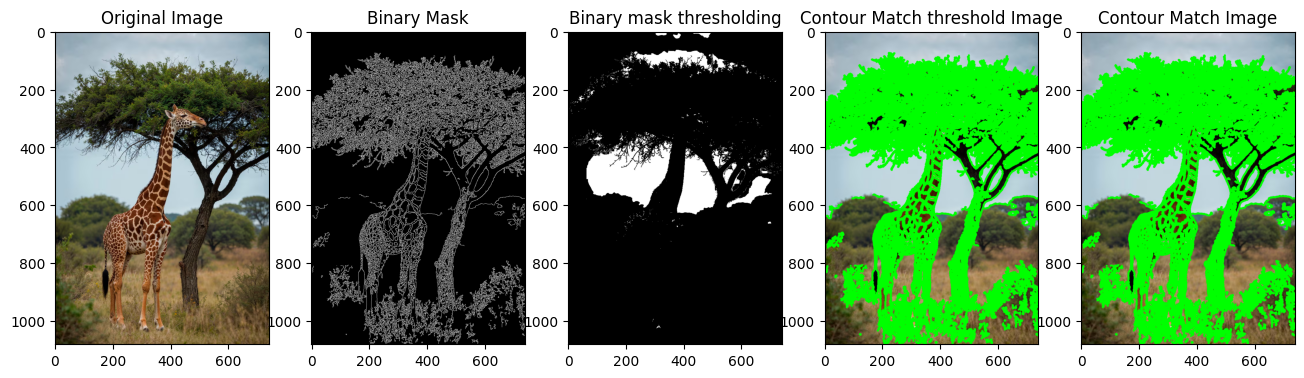

In [27]:
retval,binary=cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY) #Above 200 -> 1 (white) below that 0 (Black)

# plt.imshow(binary,cmap="gray")

contour_image_thre=image.copy()
contour_Match2=cv2.drawContours(contour_image_thre,contours,-1,(0,255,0),5)

plt.figure(figsize=(16,10))


plt.subplot(1,5,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,5,2)
plt.imshow(binary_mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,5,3)
plt.imshow(binary,cmap="gray")
plt.title("Binary mask thresholding")

plt.subplot(1,5,4)
plt.imshow(cv2.cvtColor(contour_image_thre,cv2.COLOR_BGR2RGB))
plt.title("Contour Match threshold Image")


plt.subplot(1,5,5)
plt.imshow(cv2.cvtColor(contour_image1,cv2.COLOR_BGR2RGB))
plt.title("Contour Match Image")


O/p is same if we use canny and thresholding but binary mask will be different

#Another Approach instead of using Threshold and canny

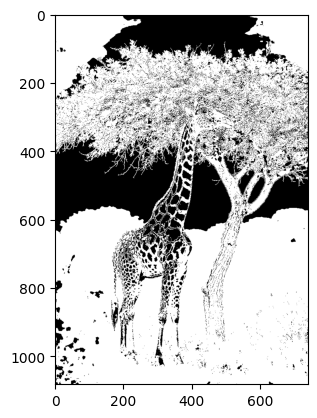

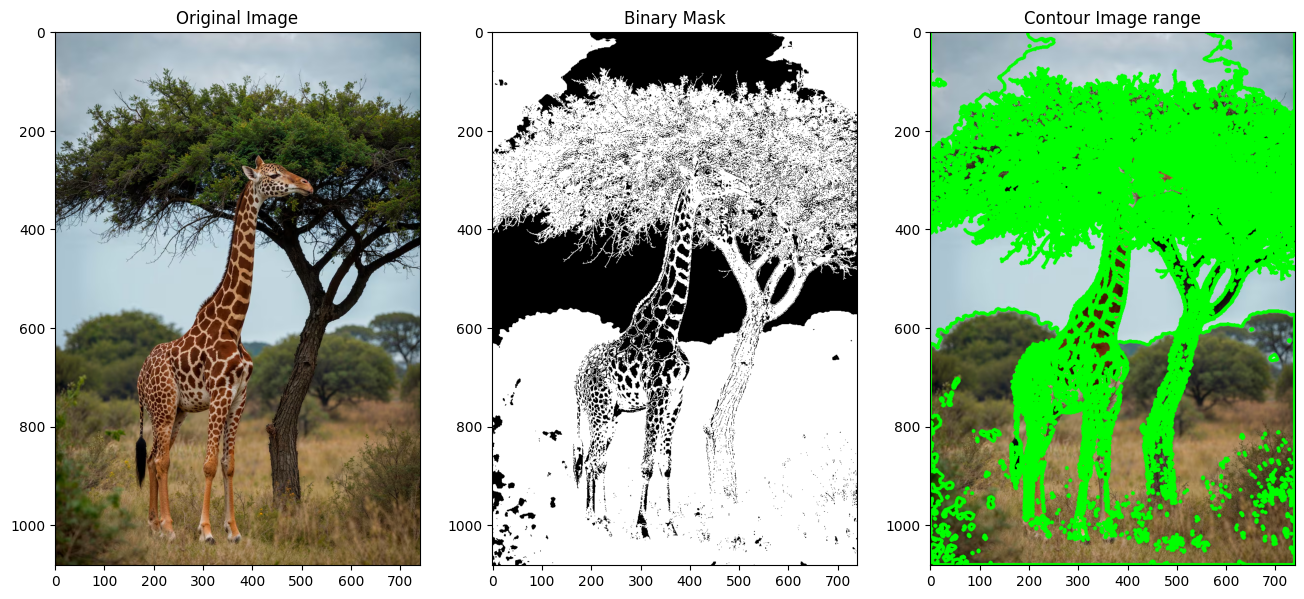

In [37]:
import numpy as np

lower_bound= np.array([0,0,0],dtype=np.uint8) # these are the colors we need define based on the colors not useing edge detection
upper_bound=np.array([200,200,200],dtype=np.uint8)

image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# We are ony targetting certain color of our RGB image and creating mask
mask=cv2.inRange(image_hsv,lower_bound,upper_bound)

plt.imshow(mask,cmap="gray")


contours,hierachy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #Above 200 -> 1 (white) below that 0 (Black)

# plt.imshow(binary,cmap="gray")

contour_image_range=image.copy()
cv2.drawContours(contour_image_range,contours,-1,(0,255,0),5)

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image_range,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()

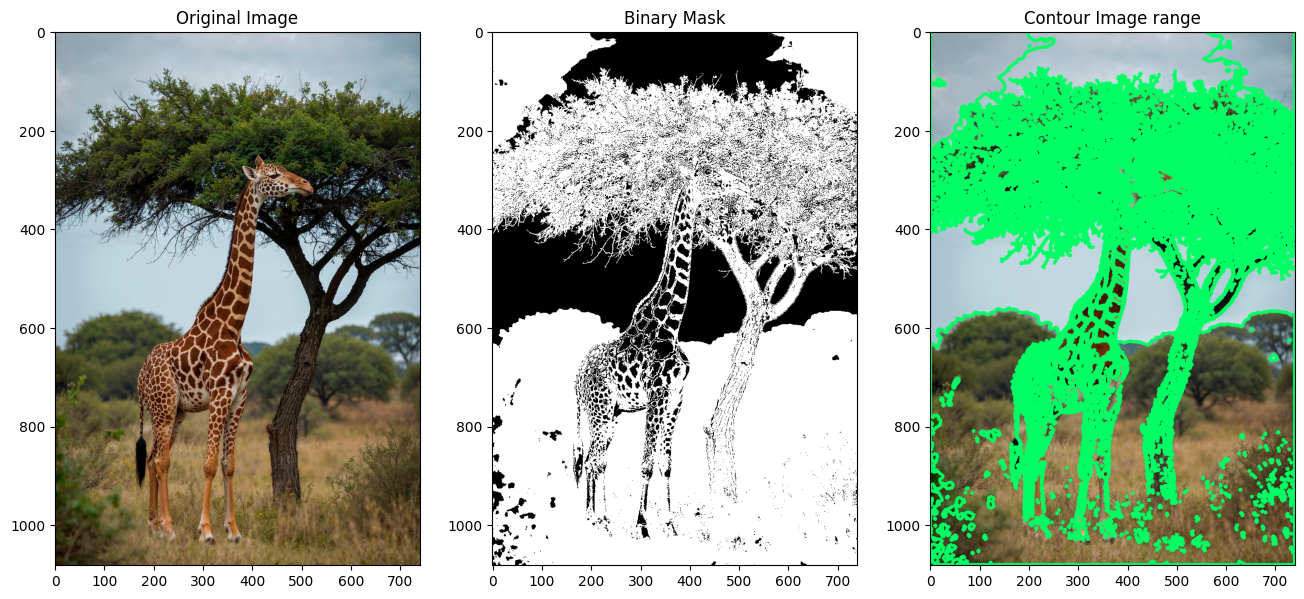

In [43]:
import numpy as np

lower_bound= np.array([0,0,0],dtype=np.uint8) # these are the colors we need define based on the colors not useing edge detection
upper_bound=np.array([200,200,200],dtype=np.uint8)

image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# We are ony targetting certain color of our RGB image and creating mask
mask=cv2.inRange(image_hsv,lower_bound,upper_bound)

# plt.imshow(mask,cmap="gray")


contours,hierachy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #Above 200 -> 1 (white) below that 0 (Black)

# plt.imshow(binary,cmap="gray")

contour_image_range=image.copy()
cv2.drawContours(contour_image_range,contours,-1,(100,255,0),5) # to fill with

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image_range,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()

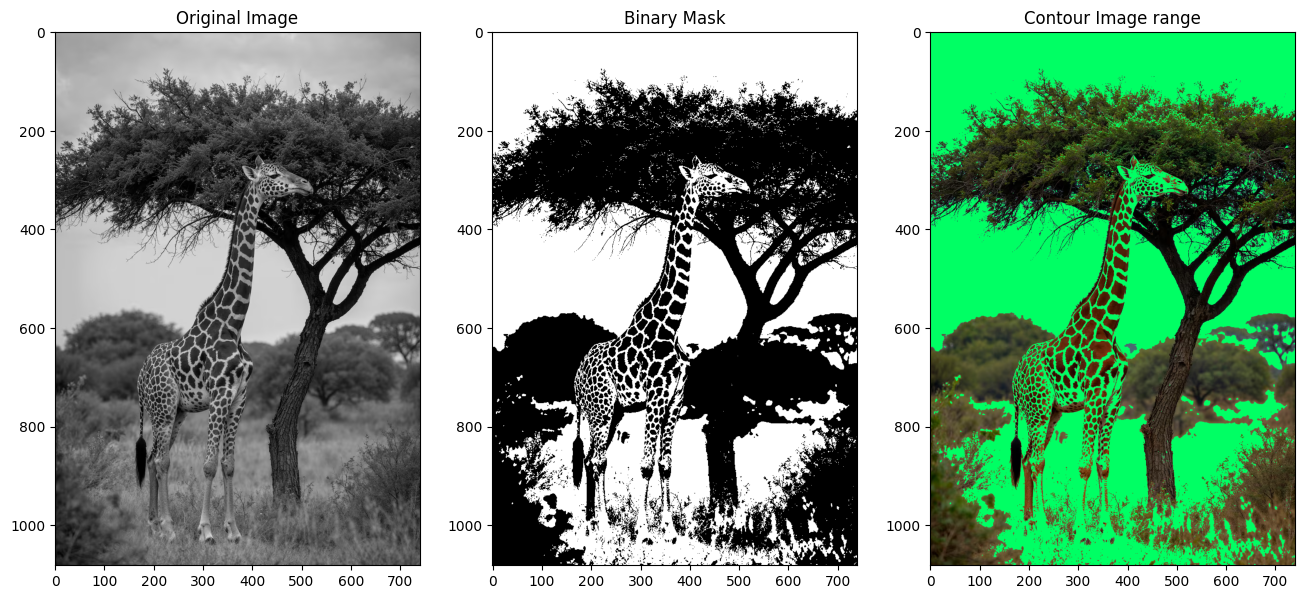

In [6]:
import numpy as np

lower_bound= np.array([100],dtype=np.uint8) # these are the colors we need define based on the colors not useing edge detection
upper_bound=np.array([255],dtype=np.uint8)

image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


# We are ony targetting certain color of our RGB image and creating mask
mask=cv2.inRange(image_gray,lower_bound,upper_bound)

# plt.imshow(mask,cmap="gray")


contours,hierachy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #Above 200 -> 1 (white) below that 0 (Black)

# plt.imshow(binary,cmap="gray")

contour_image_range=image.copy()
cv2.drawContours(contour_image_range,contours,-1,(100,255,0),-1) # to fill with

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image_gray,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image_range,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()

In [45]:
import numpy as np

lower_bound= np.array([0,0,0],dtype=np.uint8) # these are the colors we need define based on the colors not useing edge detection
upper_bound=np.array([200,200,200],dtype=np.uint8)

image_hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# We are ony targetting certain color of our RGB image and creating mask
mask=cv2.inRange(image_hsv,lower_bound,upper_bound)

# plt.imshow(mask,cmap="gray")


contours,hierachy=cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) #Above 200 -> 1 (white) below that 0 (Black)

sorted_contours=sorted(contours,key=cv2.contourArea,reverse=True)

print(len(sorted_contours))

16271


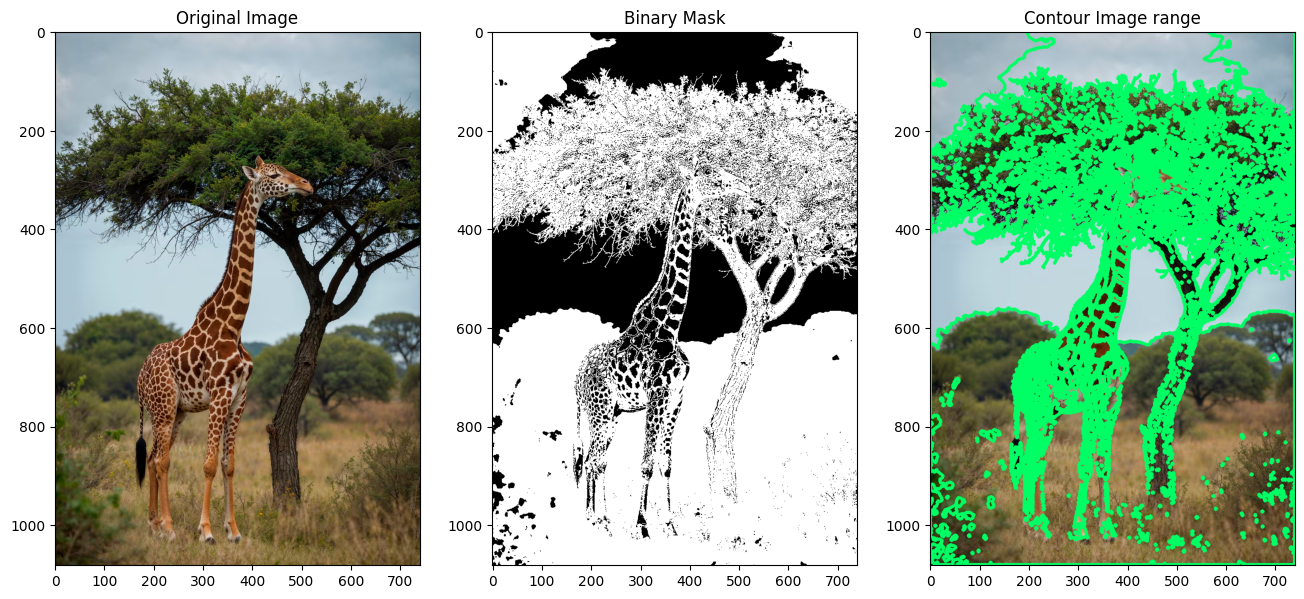

In [48]:
# plt.imshow(binary,cmap="gray")

contour_image_range=image.copy()
cv2.drawContours(contour_image_range,sorted_contours[0:5000],-1,(100,255,0),5) # to fill with

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image_range,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()

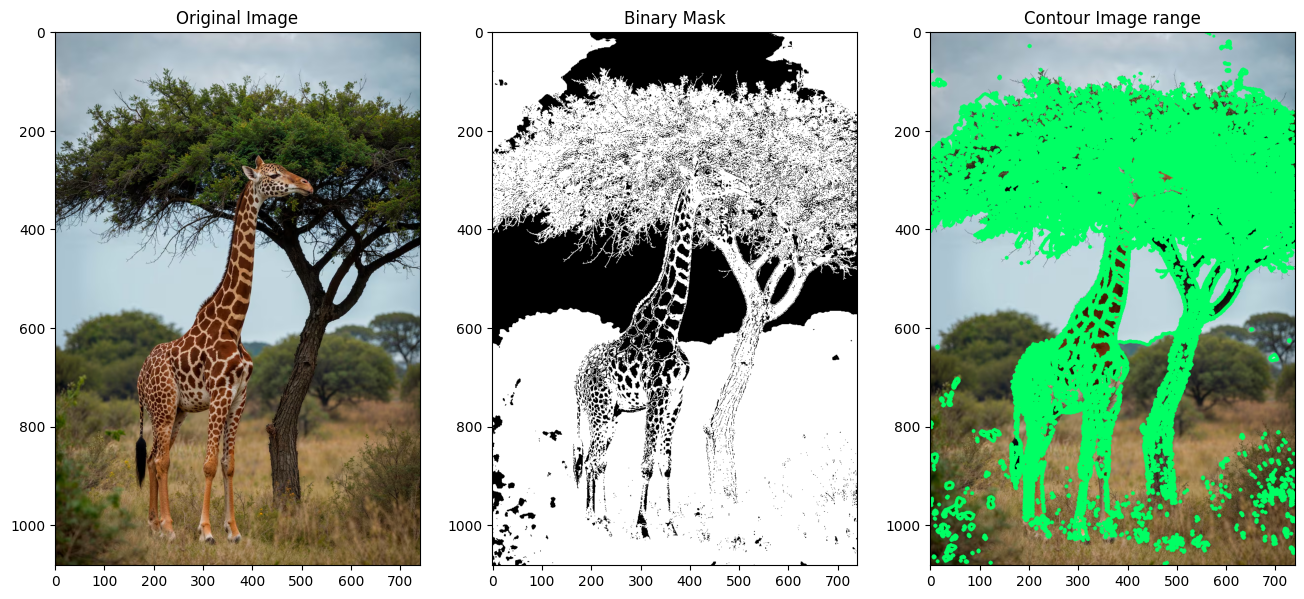

In [53]:
#if u make the sorted_contours[0:16272] But we have only 16271 the whole image should not considered we need to start from the 1
# plt.imshow(binary,cmap="gray")

contour_image_range=image.copy()
coutour_match_Sorted=cv2.drawContours(contour_image_range,sorted_contours[1:16272],-1,(100,255,0),5) # to fill with

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(coutour_match_Sorted,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()

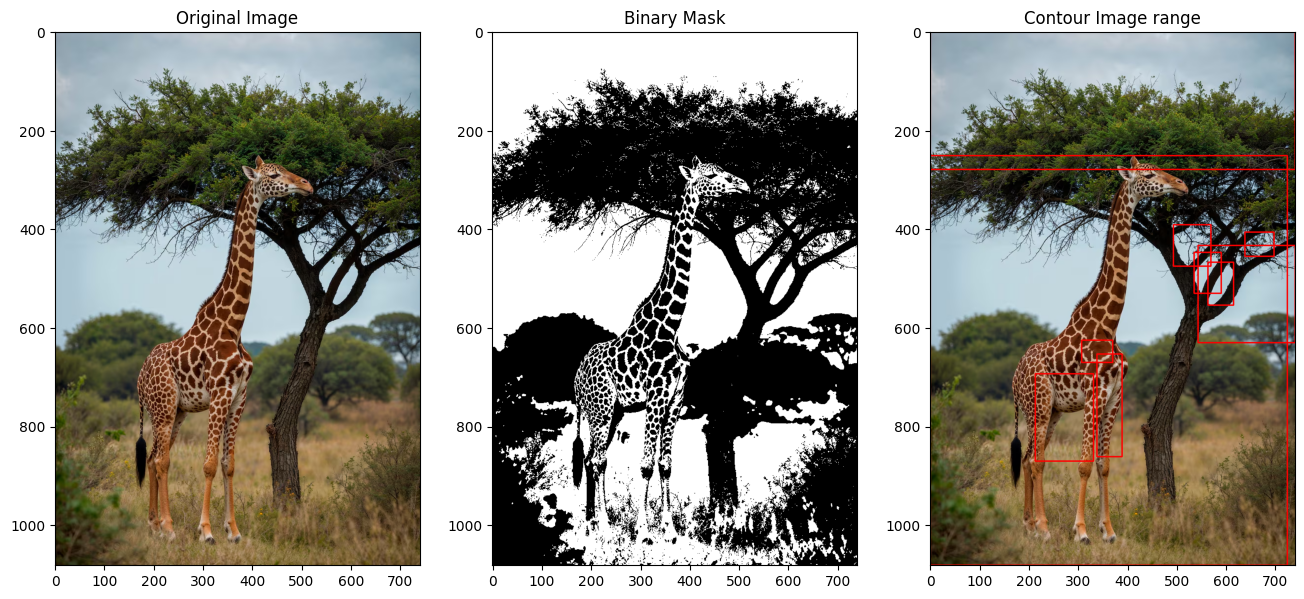

In [8]:
# It wil draw rectangle box  in the shape

contour_image=image.copy()
sorted_contours=sorted(contours,key=cv2.contourArea,reverse=True)


for contour in sorted_contours[0:10]:
  x,y,w,h=cv2.boundingRect(contour)
  cv2.rectangle(contour_image,(x,y),(x+w,y+h),(0,0,255),2)

plt.figure(figsize=(16,10))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="gray")
plt.title("Binary Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image range")

plt.show()